In [1]:
#using bi-directional bfs to solve a navigation problem
from collections import deque

def bidirectional_bfs(map, start, end):
    if start == end:
        return [start]

    queue_start = deque([start])
    queue_end = deque([end])
    
    visited_start = {start}
    visited_end = {end}

    parent_start = {start: None}
    parent_end = {end: None}

    while queue_start and queue_end:
        if _bfs_step(map, queue_start, visited_start, parent_start, visited_end):
            return _reconstruct_path(start, end, parent_start, parent_end)

        if _bfs_step(map, queue_end, visited_end, parent_end, visited_start):
            return _reconstruct_path(start, end, parent_start, parent_end)

    return None 


In [2]:
def _bfs_step(map, queue, visited, parent, other_visited):
    current = queue.popleft()
    for neighbor in map.get(current, []):
        if neighbor not in visited:
            visited.add(neighbor)
            parent[neighbor] = current
            queue.append(neighbor)
            if neighbor in other_visited:
                return True  
    return False


In [3]:
def _reconstruct_path(start, end, parent_start, parent_end):
    intersection = None
    for node in parent_start:
        if node in parent_end:
            intersection = node
            break

    path = []
    current = intersection
    while current is not None:
        path.append(current)
        current = parent_start[current]
    path.reverse()

    current = parent_end[intersection]
    while current is not None:
        path.append(current)
        current = parent_end[current]

    return path

In [4]:
if __name__ == "__main__":
    city_map = {
        'A': ['B', 'C'],
        'B': ['A', 'D'],
        'C': ['A', 'E'],
        'D': ['B', 'E', 'F'],
        'E': ['C', 'D', 'F'],
        'F': ['D', 'E']
    }
    start = 'A'
    end = 'F'
    shortest_path = bidirectional_bfs(city_map, start, end)
    if shortest_path:
        print(f"Shortest path from {start} to {end}: {' -> '.join(shortest_path)}")
    else:
        print(f"No path found between {start} and {end}.")

Shortest path from A to F: A -> B -> D -> F


In [5]:
def _combine_paths(visited_start, visited_end, start, end):
    intersection = next(node for node in visited_start if node in visited_end)
    
    path = []
    current = intersection
    while current:
        path.append(current)
        current = visited_start[current]
    path.reverse()

    current = visited_end[intersection]
    while current:
        path.append(current)
        current = visited_end[current]

    return path

def bfs(map, start, end):
    queue = deque([start])
    visited = {start: None}

    while queue:
        current = queue.popleft()
        if current == end:
            return _reconstruct_path(visited, start, end)
        for neighbor in map.get(current, []):
            if neighbor not in visited:
                visited[neighbor] = current
                queue.append(neighbor)

    return "No path found"

def dfs(map, start, end):
    stack = [start]
    visited = {start: None}

    while stack:
        current = stack.pop()
        if current == end:
            return _reconstruct_path(visited, start, end)
        for neighbor in map.get(current, []):
            if neighbor not in visited:
                visited[neighbor] = current
                stack.append(neighbor)

    return "No path found"

def _reconstruct_path(visited, start, end):
    path = []
    current = end
    while current:
        path.append(current)
        current = visited[current]
    path.reverse()
    return path

if __name__ == "__main__":
    city_map = {
        'A': ['B', 'C'],
        'B': ['A', 'D'],
        'C': ['A', 'E'],
        'D': ['B', 'E', 'F'],
        'E': ['C', 'D', 'F'],
        'F': ['D', 'E']
    }

    start = 'A'
    end = 'F'

    print("\nStandard BFS:")
    print(bfs(city_map, start, end))

    print("\nDFS:")
    print(dfs(city_map, start, end))



Standard BFS:
['A', 'B', 'D', 'F']

DFS:
['A', 'C', 'E', 'F']


In [6]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


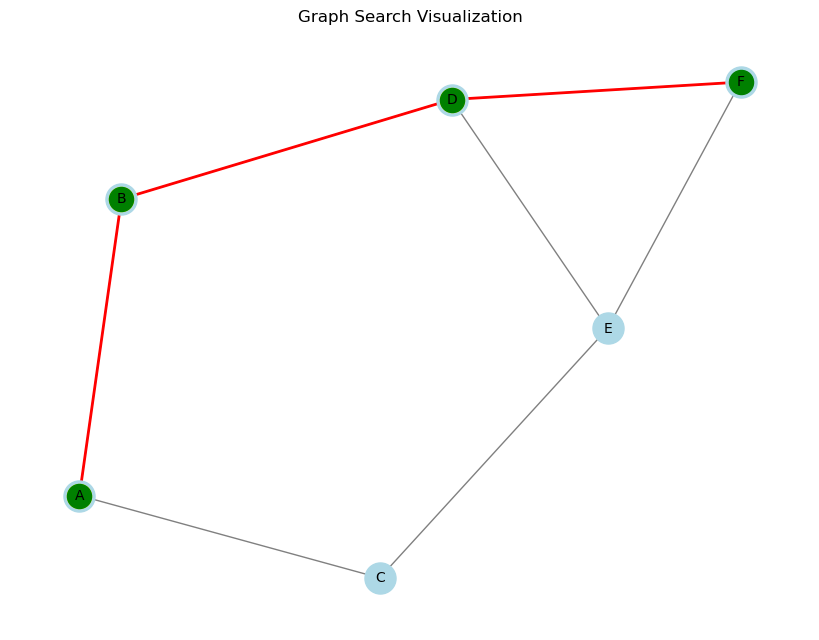

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph, visited_nodes, path=None, title="Graph Visualization"):
    
    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = nx.spring_layout(G)

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=500, font_size=10)

    if visited_nodes:
        nx.draw_networkx_nodes(G, pos, nodelist=visited_nodes, node_color="yellow")

    if path:
        edges_in_path = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color="red", width=2)
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color="green")

    plt.title(title)
    plt.show()
    
city_map = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A', 'E'],
    'D': ['B', 'E', 'F'],
    'E': ['C', 'D', 'F'],
    'F': ['D', 'E']
}

visited_nodes = ['A', 'B', 'D']  
path = ['A', 'B', 'D', 'F']    

visualize_graph(city_map, visited_nodes, path, title="Graph Search Visualization")